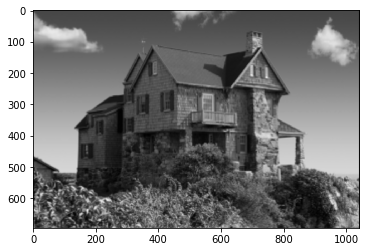

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


img = Image.open('image_1.png')
plt.imshow(img, cmap='gray')

In [2]:
image_array = np.asarray(img)
#image_array.shape

In [3]:
def vertical_edge_detector(image):
    
    # Define the vertical edge detection kernel
    kernel = np.array([[-1, 0, 1],
                       [-2, 0, 2],
                       [-1, 0, 1]], dtype=int)

    # Apply the vertical edge detection kernel using convolution
    edges = np.abs(np.convolve(image.ravel(), kernel.ravel(), mode='same'))

    # Normalize the output to the range [0, 255]
    edges = (edges / np.max(edges)) * 255
    
    # Apply a threshold to enhance the edges
    threshold = 22  # Adjust the threshold value as needed
    edges = np.where(edges >= threshold, 255, 0)
    
    edges = edges.reshape(image.shape)
    return edges.astype(np.uint8)


In [4]:
new_img = vertical_edge_detector(image_array)

In [5]:
print(np.min(new_img))
print(np.max(new_img))

0
255


In [6]:
print(image_array.shape)
print(new_img.shape)

(695, 1042, 4)
(695, 1042, 4)


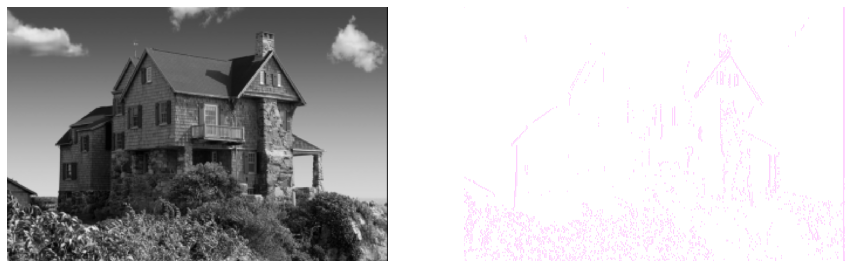

In [7]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(image_array, cmap='gray')
plt.axis('off')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(new_img, cmap='gray')
plt.axis('off')

plt.show(block=True)